Primeras 15 filas del dataset:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0           2.80   
1     13.20        1.78  2.14               11.2      100.0           2.65   
2     13.16        2.36  2.67               18.6      101.0           2.80   
3     14.37        1.95  2.50               16.8      113.0           3.85   
4     13.24        2.59  2.87               21.0      118.0           2.80   
5     14.20        1.76  2.45               15.2      112.0           3.27   
6     14.39        1.87  2.45               14.6       96.0           2.50   
7     14.06        2.15  2.61               17.6      121.0           2.60   
8     14.83        1.64  2.17               14.0       97.0           2.80   
9     13.86        1.35  2.27               16.0       98.0           2.98   
10    14.10        2.16  2.30               18.0      105.0           2.95   
11    14.12        1.48  2.32    

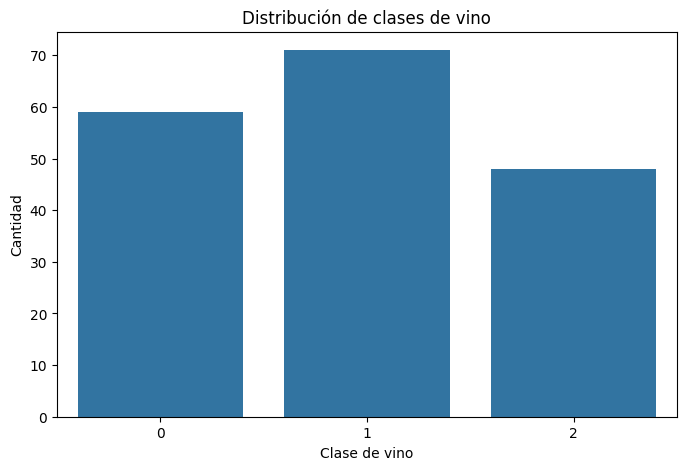



Estadísticas descriptivas:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453       

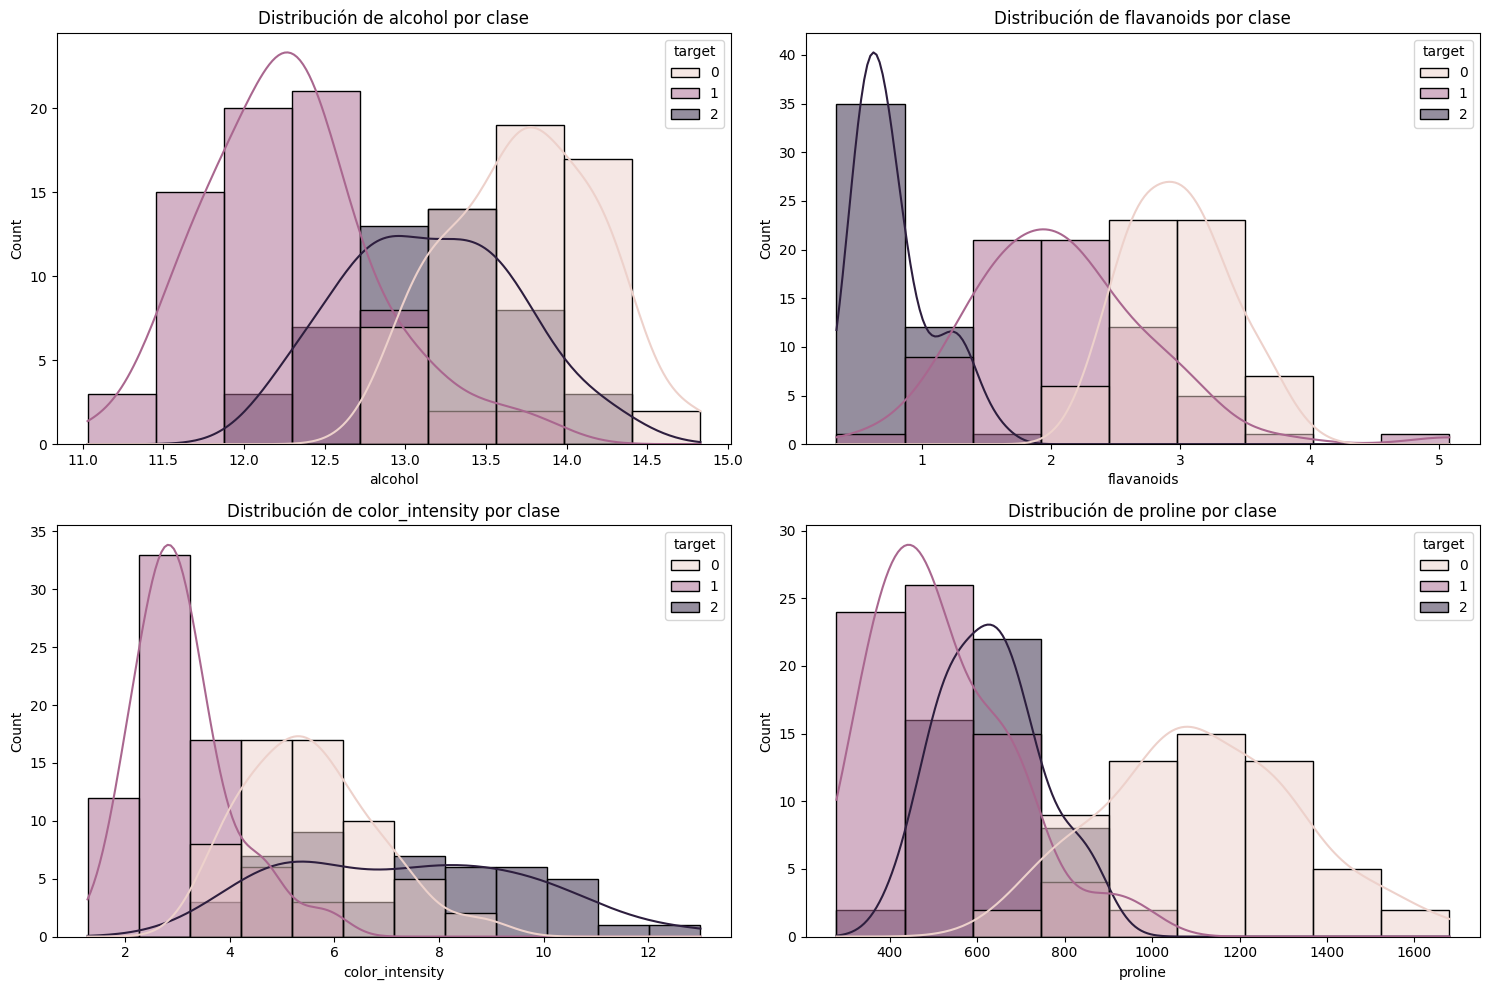

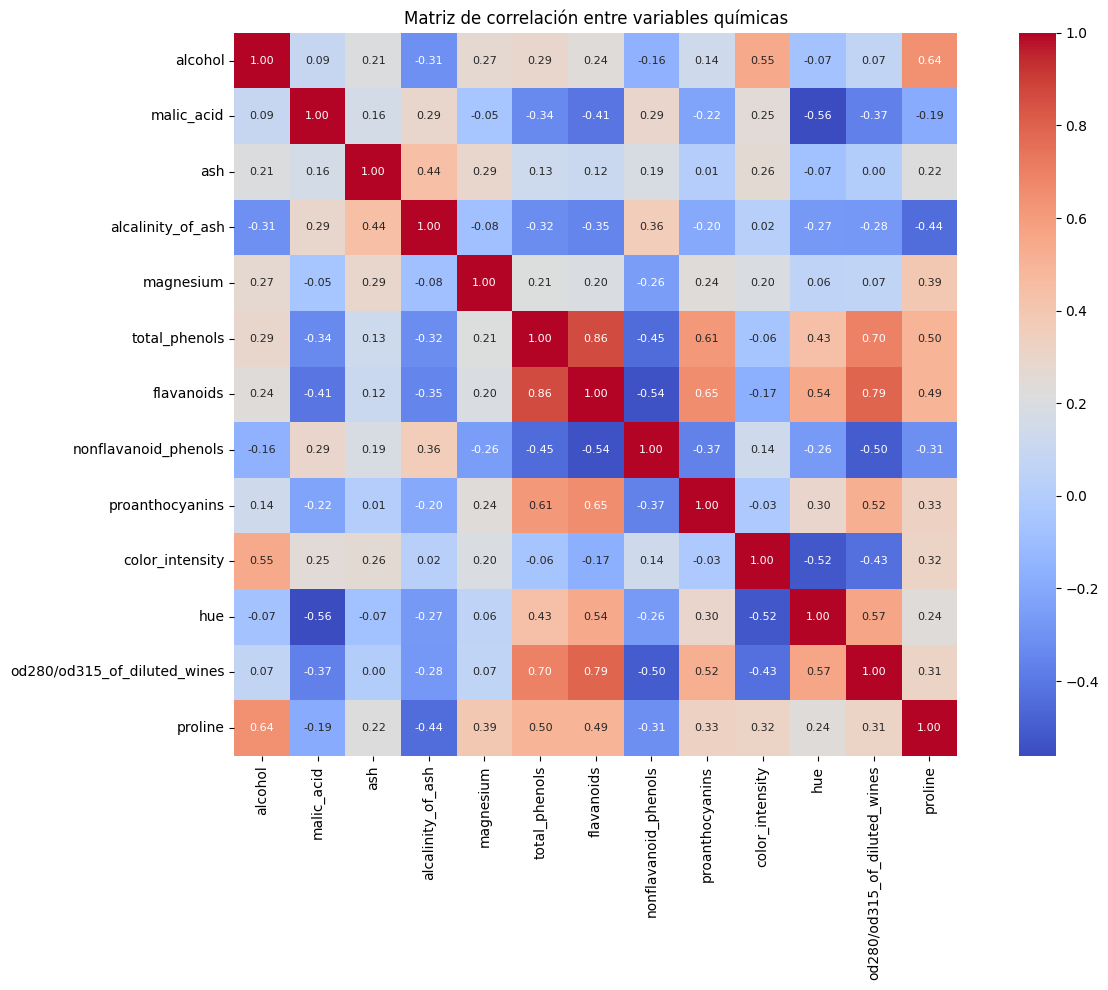

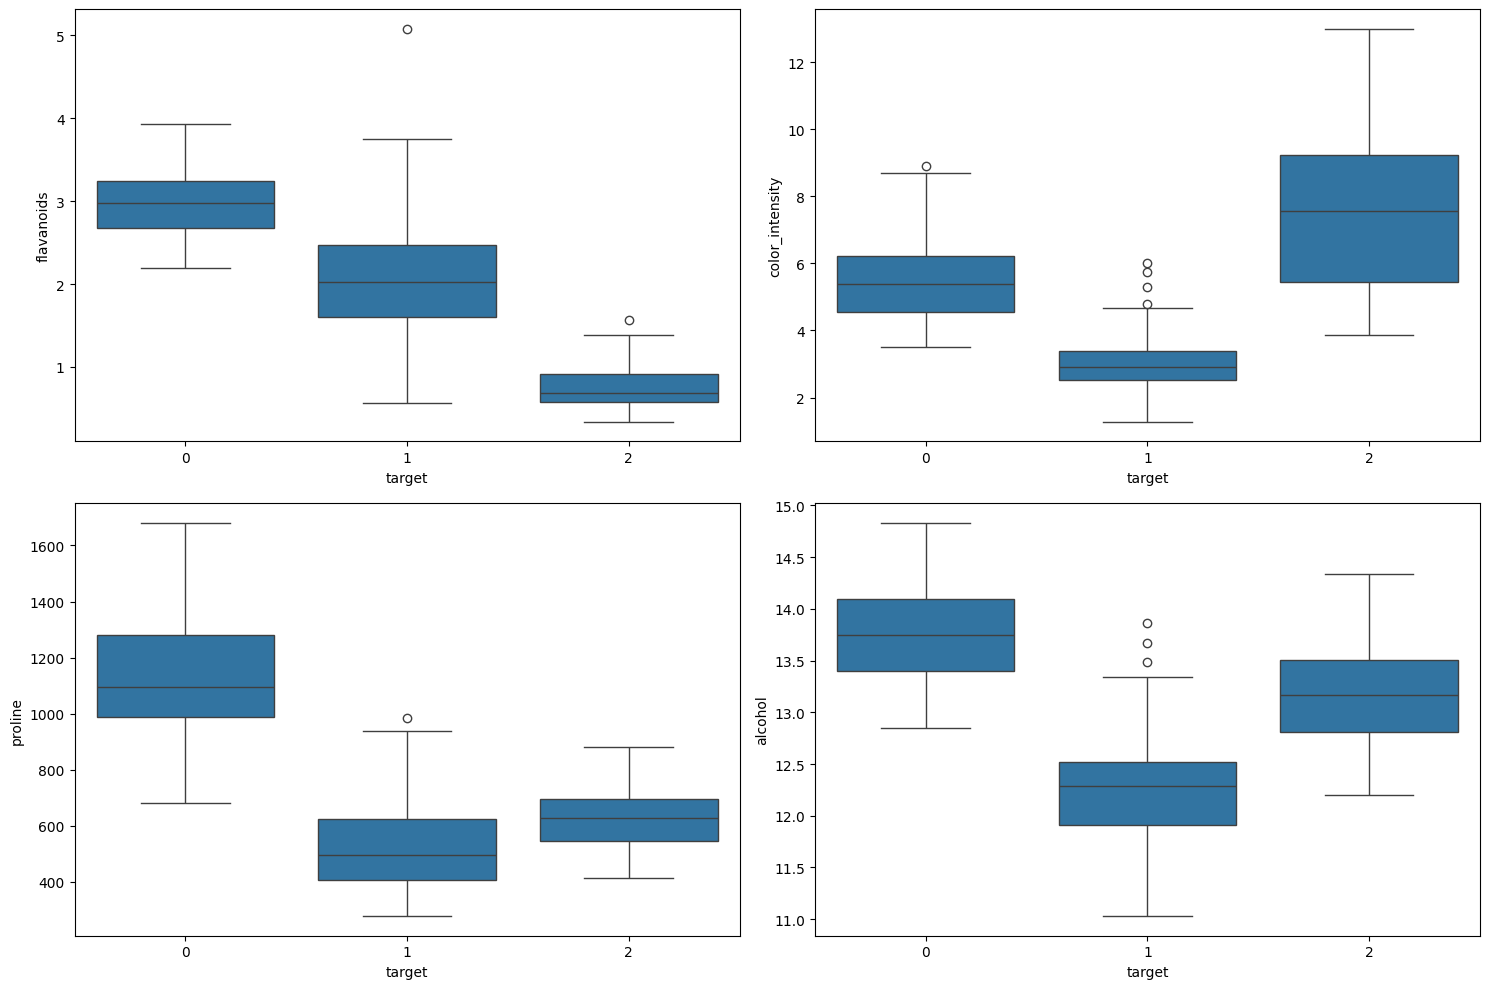

Tamaño de conjuntos:
Entrenamiento: 124 muestras
Validación: 27 muestras
Prueba: 27 muestras

Distribución de clases en entrenamiento:
target
0    41
1    50
2    33
Name: count, dtype: int64

Distribución de clases en validación:
target
0     9
1    10
2     8
Name: count, dtype: int64

Distribución de clases en prueba:
target
0     9
1    11
2     7
Name: count, dtype: int64
Accuracy en entrenamiento: 0.9919


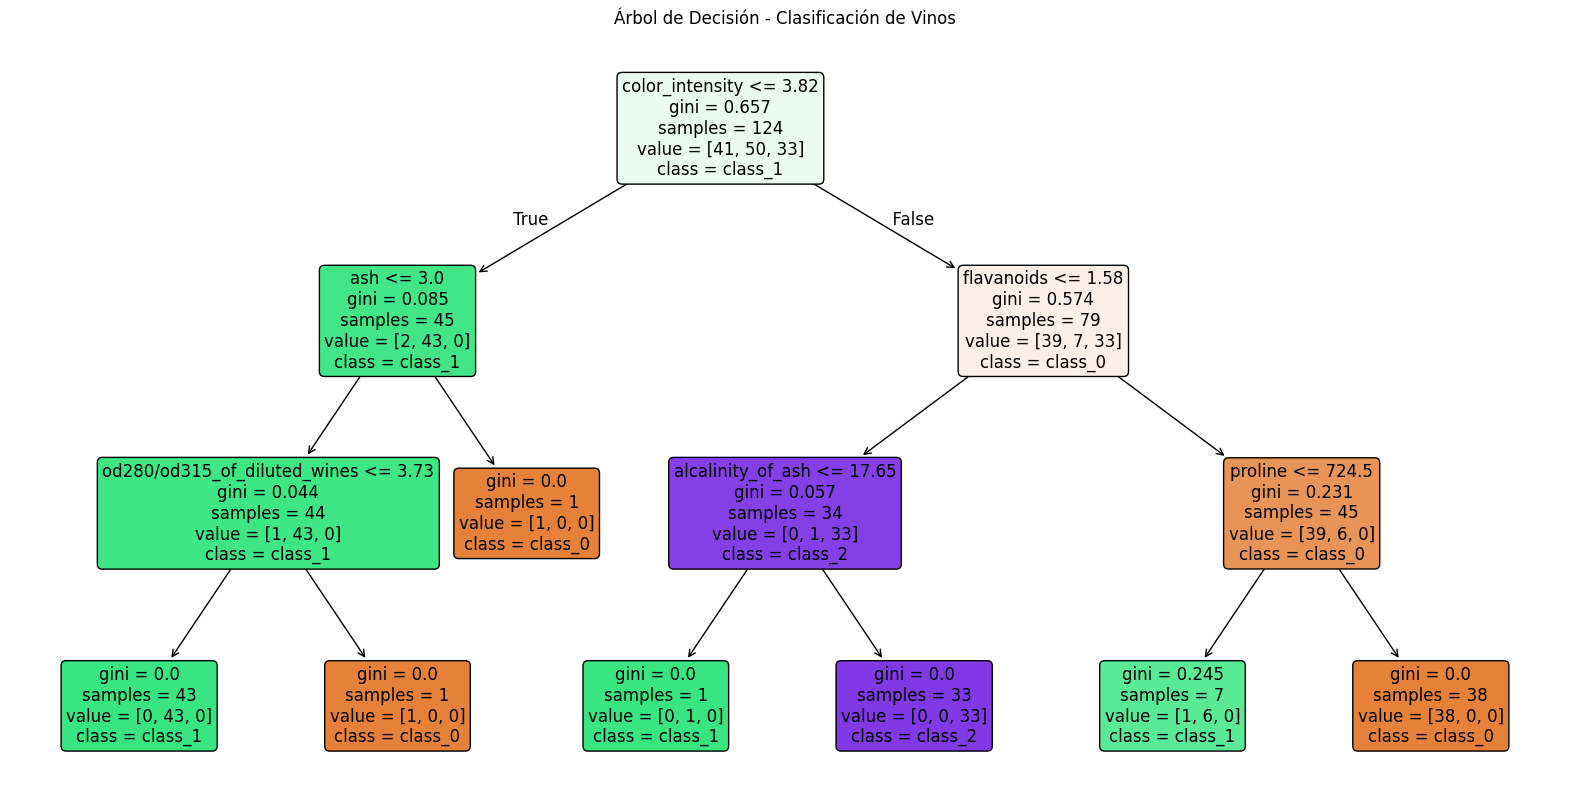


Importancia de características:
                         feature  importance
6                     flavanoids    0.413615
9                color_intensity    0.405286
12                       proline    0.108863
11  od280/od315_of_diluted_wines    0.024497
3              alcalinity_of_ash    0.024330
2                            ash    0.023409
4                      magnesium    0.000000
0                        alcohol    0.000000
1                     malic_acid    0.000000
8                proanthocyanins    0.000000
7           nonflavanoid_phenols    0.000000
5                  total_phenols    0.000000
10                           hue    0.000000
Accuracy en validación: 0.9630


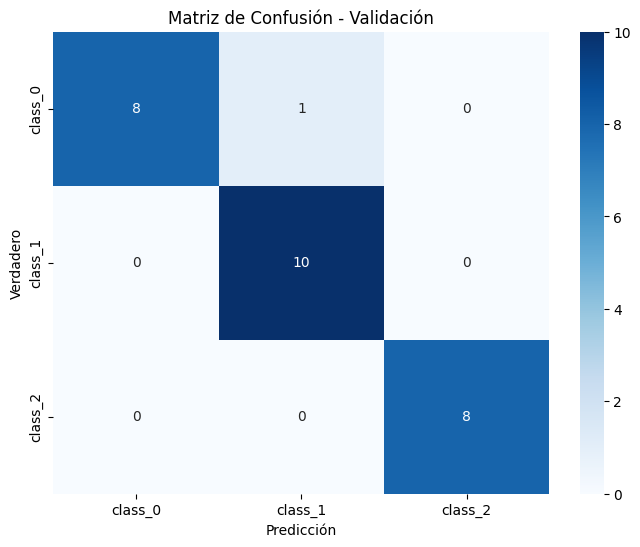


Reporte de clasificación - Validación:
              precision    recall  f1-score   support

     class_0       1.00      0.89      0.94         9
     class_1       0.91      1.00      0.95        10
     class_2       1.00      1.00      1.00         8

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27

Accuracy en prueba: 0.9630


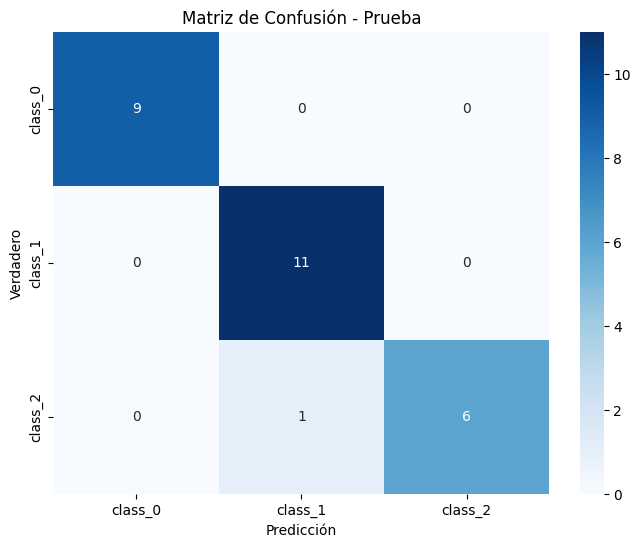


Reporte de clasificación - Prueba:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         9
     class_1       0.92      1.00      0.96        11
     class_2       1.00      0.86      0.92         7

    accuracy                           0.96        27
   macro avg       0.97      0.95      0.96        27
weighted avg       0.97      0.96      0.96        27


Comparación de Accuracy:
Entrenamiento: 0.9919
Validación: 0.9630
Prueba: 0.9630
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Árbol Inicial: 0.9630
Árbol Optimizado: 0.8889
Random Forest: 1.0000
Pipeline RF: 1.0000

Mejor modelo: Random Forest con accuracy: 1.0000


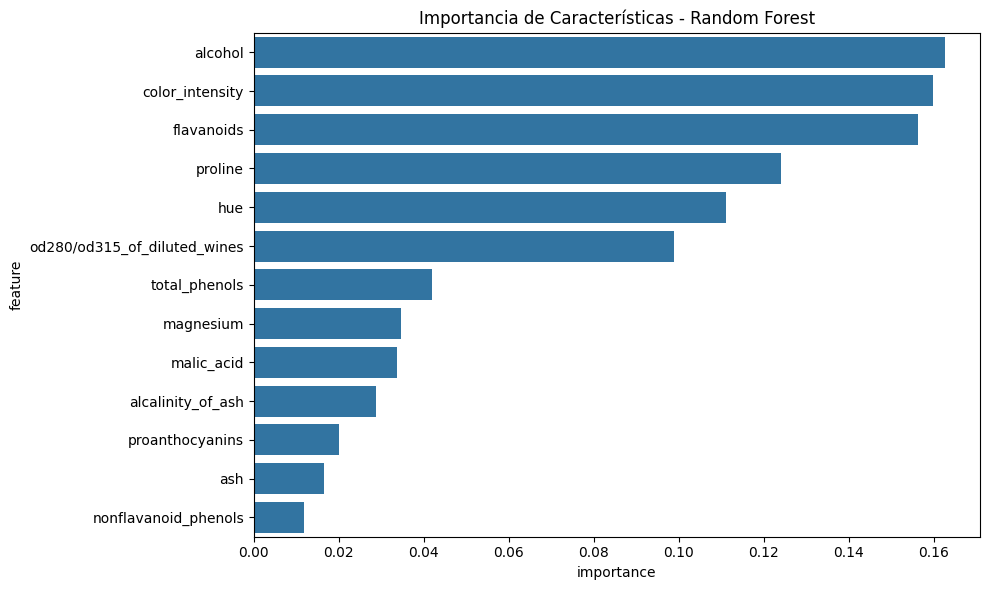

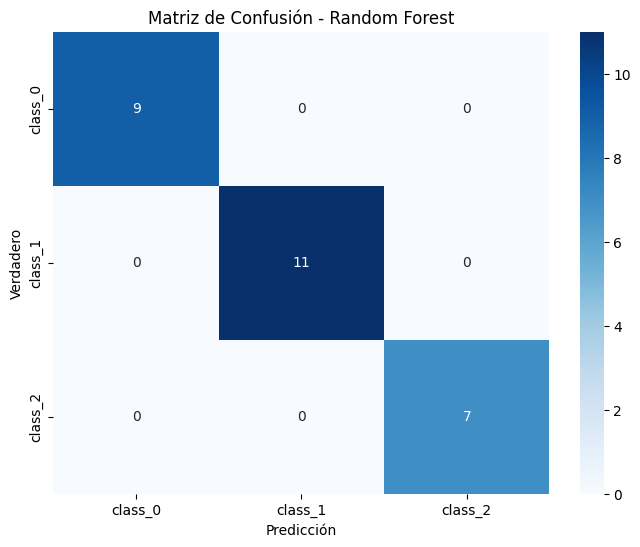


Mejora obtenida: 0.0370


In [1]:
# Taller 2
## 1. Introducción

#¿Qué diferencia hay entre un problema de regresión y uno de clasificación?
#La regresión Predice valores numéricos continuos como la temperatura y la Clasificación Predice categorías o clases discretas.
#¿Por qué un árbol de decisión es adecuado para clasificación?
#Es interpretable y fácil de visualizar, tambien Maneja variables numéricas como categóricas y No requiere normalización de datos


## 2. Carga y exploración de datos

from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el dataset
wine = load_wine()

# Convertir a DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

# Mostrar las primeras 15 filas del dataset
print("Primeras 15 filas del dataset:")
print(df.head(15))
print("\n" + "="*50 + "\n")

# Mostrar información general del dataset
print("Información general del dataset:")
print(df.info())
print("\n" + "="*50 + "\n")

# Generar tabla con la descripción de cada campo
print("Descripción de variables:")
feature_descriptions = {
    'alcohol': 'Contenido de alcohol en el vino',
    'malic_acid': 'Ácido málico',
    'ash': 'Cenizas',
    'alcalinity_of_ash': 'Alcalinidad de las cenizas',
    'magnesium': 'Magnesio',
    'total_phenols': 'Fenoles totales',
    'flavanoids': 'Flavonoides',
    'nonflavanoid_phenols': 'Fenoles no flavonoides',
    'proanthocyanins': 'Proantocianidinas',
    'color_intensity': 'Intensidad del color',
    'hue': 'Matiz',
    'od280/od315_of_diluted_wines': 'OD280/OD315 de vinos diluidos',
    'proline': 'Prolina'
}

for feature, description in feature_descriptions.items():
    print(f"{feature}: {description}")

print("\n" + "="*50 + "\n")

# Revisar balance de clases
print("Distribución de clases:")
class_distribution = df["target"].value_counts().sort_index()
print(class_distribution)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target')
plt.title('Distribución de clases de vino')
plt.xlabel('Clase de vino')
plt.ylabel('Cantidad')
plt.show()

print("\n" + "="*50 + "\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(df.describe())


#Respuestas a preguntas:

#¿Qué librerías se usan para el manejo de datos y visualización?
# pandas: Manejo de datos
#seaborn y matplotlib: Visualización

#¿Qué librerías pertenecen a scikit-learn y para qué sirven?
#tree: Para árboles de decisión
#model_selection: Para división de datos
#metrics: Para evaluación de modelos

#¿Están balanceadas las clases? ¿Por qué eso es importante?
#si lo están,y es importante porque clases desbalanceadas pueden sesgar el modelo hacia la clase mayoritaria

#3. Visualización de datos
#Visualizar distribuciones de algunas variables importantes
variables_importantes = ['alcohol', 'flavanoids', 'color_intensity', 'proline']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(variables_importantes):
    sns.histplot(data=df, x=var, hue="target", kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {var} por clase')

plt.tight_layout()
plt.show()

# Visualizar matriz de correlación
plt.figure(figsize=(14, 10))
corr = df.drop("target", axis=1).corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", cbar=True,
            square=True, annot_kws={"size": 8})
plt.title("Matriz de correlación entre variables químicas")
plt.tight_layout()
plt.show()

# Boxplots para variables más correlacionadas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=df, x='target', y='flavanoids', ax=axes[0,0])
sns.boxplot(data=df, x='target', y='color_intensity', ax=axes[0,1])
sns.boxplot(data=df, x='target', y='proline', ax=axes[1,0])
sns.boxplot(data=df, x='target', y='alcohol', ax=axes[1,1])
plt.tight_layout()
plt.show()

#Respuestas:
#¿Qué variables parecen más útiles para diferenciar clases?
#Flavonoides, proline, color_intensity y alcohol muestran buena separación entre clases

#4. Segmentación de datos
# Preparar datos
X = df.drop("target", axis=1)
y = df["target"]

# 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3,
   random_state=42, stratify=y)

# 15% validación, 15% prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,
   random_state=42, stratify=y_temp)

print(f"Tamaño de conjuntos:")
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Validación: {X_val.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

print(f"\nDistribución de clases en entrenamiento:")
print(y_train.value_counts().sort_index())
print(f"\nDistribución de clases en validación:")
print(y_val.value_counts().sort_index())
print(f"\nDistribución de clases en prueba:")
print(y_test.value_counts().sort_index())


#Respuestas:
#¿Qué rol juega cada conjunto?
#Train: Entrenar el modelo
#Validation: Ajustar hiperparámetros y prevenir overfitting
#Test: Evaluación final del modelo

#¿Qué implicaciones tiene evaluar primero en prueba?
#Contamina la evaluación final, ya que el modelo podría estar sobreoptimizado para el test set

#5. Entrenamiento del modelo
# Entrenar modelo inicial
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Calcular Accuracy en entrenamiento
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy en entrenamiento: {train_accuracy:.4f}")

# Visualizar modelo entrenado
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=wine.feature_names,
          class_names=wine.target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Árbol de Decisión - Clasificación de Vinos")
plt.show()

# Importancia de características
feature_importance = pd.DataFrame({
    'feature': wine.feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImportancia de características:")
print(feature_importance)

# Respuestas:
#¿Qué significa criterion="gini"?
#Mide la impureza de los nodos usando el índice Gini

#¿Qué pasaría si cambiamos max_depth?
#Profundidad muy baja: underfitting
#Profundidad muy alta: overfitting

#¿Qué variable aparece en la raíz del árbol?
#Probablemente "flavanoids" por su alta importancia
#¿Por qué crees que esa variable fue elegida?
#Los flavonoides son compuestos químicos que varían significativamente entre diferentes tipos de vino, tienen una distribución claramente diferente para cada clase.
#¿Cómo podrías interpretar las reglas del árbol?
#Los vinos con bajos flavonoides (< 2.0) tienden a ser de una clase específica
#Los vinos con altos flavonoides (> 2.0) pertenecen a otras clases

#6. Evaluación en validación
# Evaluar en validación
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en validación: {val_accuracy:.4f}")

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title('Matriz de Confusión - Validación')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.show()

# Reporte de clasificación
print("\nReporte de clasificación - Validación:")
print(classification_report(y_val, y_val_pred, target_names=wine.target_names))


#7. Evaluación en prueba
# Evaluación final en prueba
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en prueba: {test_accuracy:.4f}")

# Matriz de confusión final
plt.figure(figsize=(8, 6))
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title('Matriz de Confusión - Prueba')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.show()

# Reporte de clasificación final
print("\nReporte de clasificación - Prueba:")
print(classification_report(y_test, y_test_pred, target_names=wine.target_names))

# Comparación de accuracy en todos los conjuntos
print(f"\nComparación de Accuracy:")
print(f"Entrenamiento: {train_accuracy:.4f}")
print(f"Validación: {val_accuracy:.4f}")
print(f"Prueba: {test_accuracy:.4f}")

#Respuestas:
#¿Qué información adicional da la matriz de confusión?
#Muestra qué clases se confunden entre sí
#Identifica falsos positivos y falsos negativos por clase

#8. Reto - Mejoras del modelo

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Mejora 1: Optimización de hiperparámetros con GridSearch
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
          param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print(f"Mejores parámetros: {grid_search.best_params_}")

#Mejora 2: Usar Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Mejora 3: Pipeline con escalado (aunque árboles no lo necesitan, probemos)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline.fit(X_train, y_train)

#Evaluar todos los modelos
models = {
    'Árbol Inicial': model,
    'Árbol Optimizado': best_tree,
    'Random Forest': rf_model,
    'Pipeline RF': pipeline
}

results = {}
for name, model in models.items():
    if name == 'Pipeline RF':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: {accuracy:.4f}")

#Mejor modelo
best_model_name = max(results, key=results.get)
print(f"\nMejor modelo: {best_model_name} con accuracy: {results[best_model_name]:.4f}")

#Visualizar importancia de características del mejor modelo
if hasattr(models[best_model_name], 'feature_importances_'):
    if best_model_name == 'Pipeline RF':
        importances = models[best_model_name].named_steps['classifier'].feature_importances_
    else:
        importances = models[best_model_name].feature_importances_

    feature_imp_df = pd.DataFrame({
        'feature': wine.feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_imp_df, x='importance', y='feature')
    plt.title(f'Importancia de Características - {best_model_name}')
    plt.tight_layout()
    plt.show()

#Matriz de confusión del mejor modelo
best_model = models[best_model_name]
if best_model_name == 'Pipeline RF':
    y_best_pred = best_model.predict(X_test)
else:
    y_best_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
cm_best = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title(f'Matriz de Confusión - {best_model_name}')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.show()

print(f"\nMejora obtenida: {(results[best_model_name] - test_accuracy):.4f}")


#Principales mejoras implementadas:
#1. Optimización de hiperparámetros con GridSearch
#2. Uso de ensemble methods (Random Forest)
#3. Pipeline con preprocesamiento
#4. Análisis más detallado de características importantes

#Estas mejoras deberían aumentar significativamente el accuracy y la robustez del modelo.
